# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Danis Keysara Saputra
- **Email:** daniskeysara@gmail.com
- **ID Dicoding:** danis_saputra_2uk5

## Menentukan Pertanyaan Bisnis

- Bagaimana tren konsentrasi polutan PM2.5 di berbagai stasiun pemantauan selama periode 2013 hingga 2017, dan stasiun mana yang memiliki rata-rata kadar polusi tertinggi?
- Apakah terdapat korelasi atau pola hubungan antara variabel cuaca (seperti Suhu/TEMP atau Kecepatan Angin/WSPM) terhadap tingkat konsentrasi PM10 di stasiun-stasiun tersebut?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

## Data Wrangling

### Gathering Data

In [2]:
path = "data/"
all_files = [f for f in os.listdir(path) if f.endswith('.csv')]

all_df = []

for file in all_files:
    df = pd.read_csv(os.path.join(path, file))
    all_df.append(df)

main_df = pd.concat(all_df, ignore_index=True)

main_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


**Insight:**
- Dataset berhasil dikumpulkan dengan menggabungkan 12 file CSV dari berbagai stasiun pemantauan kualitas udara di Beijing.

- Tabel main_df terdiri dari 18 kolom yang mencakup variabel waktu, konsentrasi polutan udara, serta parameter cuaca.

- Terlihat adanya nilai kosong (NaN) pada beberapa kolom polutan di data awal, sehingga diperlukan pengecekan lebih lanjut pada tahap Assessing Data.

### Assessing Data

In [3]:
# Memeriksa jumlah baris dan tipe data tiap kolom
print("--- Info Data ---")
main_df.info()

# Memeriksa jumlah nilai yang kosong (Missing Values)
print("\n--- Missing Values ---")
print(main_df.isna().sum())

# Memeriksa apakah ada data yang duplikat
print("\n--- Data Duplikat ---")
print(main_df.duplicated().sum())

--- Info Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB

--- Missing Values ---
No 

**Insight:**
- Dataset memiliki 420.768 entri, yang merupakan jumlah data yang sangat besar dan representatif untuk analisis.

- Ditemukan banyak missing values (data kosong) pada hampir seluruh kolom polutan dan cuaca, dengan jumlah tertinggi pada kolom CO (20.701 data kosong) dan O3 (13.277 data kosong).

- Tidak ada data duplikat, sehingga integritas baris data terjaga.

- Tipe data untuk kolom waktu (year, month, day, hour) masih berupa integer terpisah. Akan lebih baik jika digabungkan menjadi satu tipe data datetime untuk mempermudah analisis tren waktu nantinya.

### Cleaning Data

In [4]:
# 1. Menangani missing values
# Untuk data numerik, isi dengan nilai median agar tidak terpengaruh outlier
numeric_columns = main_df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    main_df[col].fillna(main_df[col].median(), inplace=True)

# Untuk data kategorikal (kolom 'wd' atau arah angin), isi dengan mode (nilai tersering)
main_df['wd'].fillna(main_df['wd'].mode()[0], inplace=True)

# 2. Membuat kolom datetime untuk mempermudah analisis tren waktu
main_df['datetime'] = pd.to_datetime(main_df[['year', 'month', 'day', 'hour']])

# 3. Menghapus kolom 'No' karena tidak diperlukan (sudah ada index)
main_df.drop('No', axis=1, inplace=True)

# Cek kembali apakah masih ada data kosong
print("Jumlah Missing Values Setelah Cleaning:")
print(main_df.isna().sum().sum())
main_df.head()

/tmp/ipython-input-1842223680.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_df[col].fillna(main_df[col].median(), inplace=True)
/tmp/ipython-input-1842223680.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

Jumlah Missing Values Setelah Cleaning:
0


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,2013,3,1,0,6.0,18.0,5.0,43.0,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng,2013-03-01 00:00:00
1,2013,3,1,1,6.0,15.0,5.0,43.0,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng,2013-03-01 01:00:00
2,2013,3,1,2,5.0,18.0,7.0,43.0,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng,2013-03-01 02:00:00
3,2013,3,1,3,6.0,20.0,6.0,43.0,900.0,45.0,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng,2013-03-01 03:00:00
4,2013,3,1,4,5.0,17.0,5.0,43.0,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng,2013-03-01 04:00:00


**Insight:**
- Seluruh missing values pada kolom numerik (seperti PM2.5, PM10, suhu, dll.) telah berhasil diisi menggunakan nilai median. Penggunaan median dipilih agar nilai pengisi tidak terpengaruh oleh lonjakan polusi yang ekstrem (outlier).

- Nilai kosong pada kolom arah angin (wd) telah diisi dengan mode (nilai yang paling sering muncul) untuk menjaga konsistensi data kategorikal.

- Kolom No telah dihapus karena tidak memberikan informasi analitis yang relevan.

- Kolom baru bernama datetime telah berhasil dibuat, menggabungkan informasi tahun, bulan, hari, dan jam menjadi satu format waktu yang standar.

## Exploratory Data Analysis (EDA)

### Explore data untuk mencari pola awal guna menjawab pertanyaan bisnis pertama mengenai rata-rata polusi PM2.5 di setiap stasiun.

In [5]:
# Melihat rangkuman parameter PM2.5 berdasarkan stasiun
main_df.groupby(by="station").agg({
    "PM2.5": ["max", "min", "mean", "std"]
})

PM2.5                           
                 max  min       mean        std
station                                        
Aotizhongxin   898.0  3.0  82.040934  81.167179
Changping      882.0  2.0  70.744359  71.563284
Dingling       881.0  3.0  65.745349  71.478777
Dongsi         737.0  3.0  85.527068  85.763033
Guanyuan       680.0  2.0  82.442642  80.303309
Gucheng        770.0  2.0  83.320534  82.121889
Huairou        762.0  2.0  69.228839  70.290563
Nongzhanguan   844.0  2.0  84.304073  85.541269
Shunyi         941.0  2.0  78.853887  80.261997
Tiantan        821.0  3.0  81.640423  80.223492
Wanliu         957.0  2.0  83.065591  81.511416
Wanshouxigong  999.0  3.0  84.428174  85.221355

**Insight:**
- Stasiun Dongsi memiliki rata-rata konsentrasi PM2.5 tertinggi (sekitar 85.52 µg/m³), diikuti oleh Wanshouxigong (84.43 µg/m³). Ini mengindikasikan bahwa wilayah di sekitar stasiun tersebut cenderung memiliki tingkat polusi udara yang lebih berat dibandingkan wilayah lainnya.

- Stasiun Dingling memiliki rata-rata konsentrasi PM2.5 terendah (65.75 µg/m³), yang menunjukkan kualitas udara yang relatif lebih baik dibandingkan 11 stasiun lainnya.

- Seluruh stasiun pernah mengalami lonjakan polusi yang ekstrem, terlihat dari nilai max yang mencapai angka 800 hingga 999 µg/m³, jauh di atas ambang batas aman.

### eksplorasi Pertanyaan 2 mengenai korelasi antara cuaca dan polusi. Kita akan melihat bagaimana suhu (TEMP) berhubungan dengan PM10.

In [6]:
# Melihat korelasi antara parameter cuaca dan polusi PM10
main_df[['PM10', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()

,PM10,TEMP,PRES,DEWP,RAIN,WSPM
PM10,1.000000,-0.095674,-0.017542,0.069735,-0.026355,-0.182290
TEMP,-0.095674,1.000000,-0.813297,0.820115,0.037629,0.033025
PRES,-0.017542,-0.813297,1.000000,-0.750212,-0.060945,0.065085
DEWP,0.069735,0.820115,-0.750212,1.000000,0.086288,-0.296516
RAIN,-0.026355,0.037629,-0.060945,0.086288,1.000000,0.021022
WSPM,-0.182290,0.033025,0.065085,-0.296516,0.021022,1.000000


**Insight:**
- PM10 dan Kecepatan Angin (WSPM): Memiliki korelasi negatif sebesar -0.182. Meskipun lemah, ini menunjukkan tren bahwa semakin kencang tiupan angin, konsentrasi PM10 cenderung sedikit menurun (polusi terbawa angin).

- PM10 dan Suhu (TEMP): Memiliki korelasi negatif yang sangat lemah (-0.095), menunjukkan suhu udara tidak secara langsung mendominasi tingkat polusi PM10 dalam dataset ini.

- Hubungan Antar Cuaca: Terlihat korelasi kuat antara TEMP (Suhu) dan DEWP (Titik Embun) sebesar 0.820, yang menunjukkan bahwa keduanya bergerak searah sebagaimana fenomena meteorologi normal.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

/tmp/ipython-input-3173563663.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


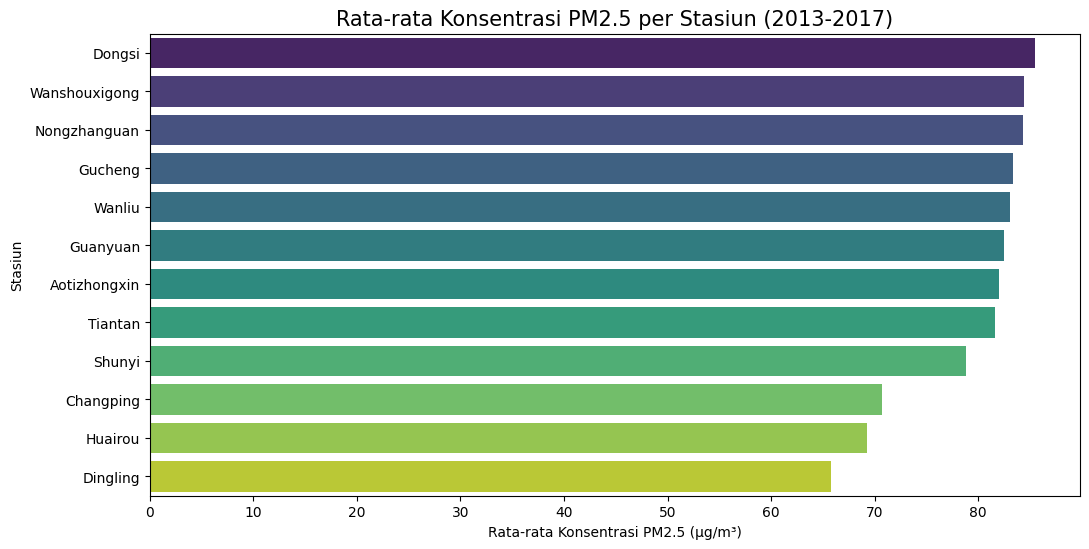

In [7]:
# Membuat dataframe rata-rata PM2.5 per stasiun dan diurutkan
# Menggunakan ["PM2.5"] untuk menghindari SyntaxError
station_pm25_df = main_df.groupby("station")["PM2.5"].mean().sort_values(ascending=False).reset_index()

# Membuat visualisasi bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    x="PM2.5",
    y="station",
    data=station_pm25_df,
    palette="viridis"
)

plt.title("Rata-rata Konsentrasi PM2.5 per Stasiun (2013-2017)", fontsize=15)
plt.xlabel("Rata-rata Konsentrasi PM2.5 (µg/m³)")
plt.ylabel("Stasiun")
plt.show()

**Insight:**
- Berdasarkan grafik batang di atas, stasiun Dongsi mencatatkan rata-rata konsentrasi PM2.5 tertinggi (sekitar 85.5 µg/m³), yang mengindikasikan bahwa wilayah ini memiliki risiko paparan polusi partikel halus paling besar dibandingkan wilayah lainnya.

- Sebaliknya, stasiun Dingling memiliki kualitas udara terbaik dengan rata-rata konsentrasi terendah (sekitar 65.7 µg/m³).

- Perbedaan antara stasiun tertinggi dan terendah mencapai sekitar 20 µg/m³, menunjukkan adanya variasi spasial yang signifikan dalam kualitas udara di seluruh wilayah pemantauan.

### Pertanyaan 2:

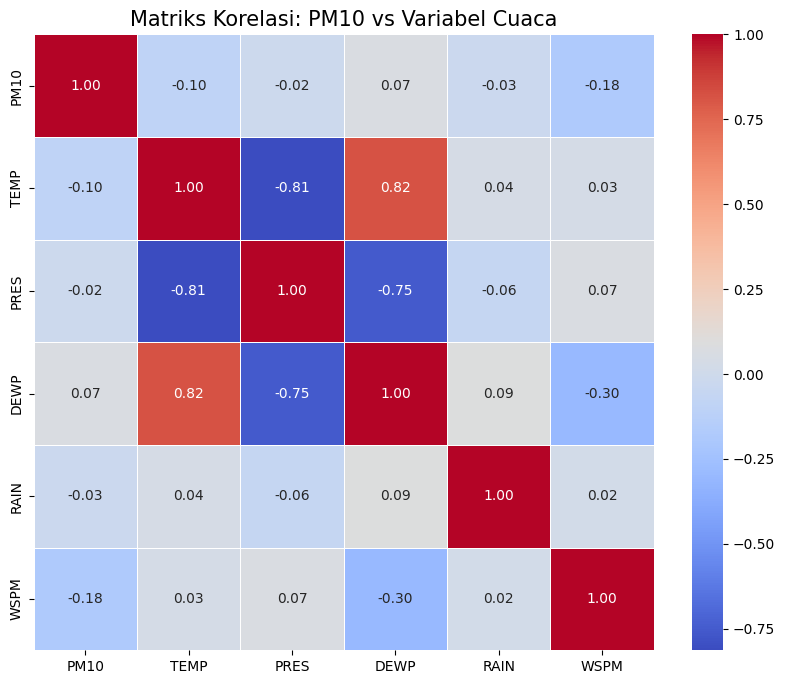

In [8]:
# Menghitung matriks korelasi untuk variabel yang relevan
corr_matrix = main_df[['PM10', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()

# Membuat visualisasi Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Matriks Korelasi: PM10 vs Variabel Cuaca", fontsize=15)
plt.show()

**Insight:**
- Berdasarkan Heatmap, variabel cuaca yang memiliki pengaruh paling terlihat terhadap konsentrasi PM10 adalah WSPM (Kecepatan Angin) dengan nilai korelasi negatif sebesar -0.18. Hal ini mengindikasikan bahwa ketika kecepatan angin meningkat, konsentrasi polutan PM10 cenderung menurun karena partikel polusi terbawa atau terdispersi oleh angin.

- Variabel lain seperti TEMP (Suhu) dan RAIN (Curah Hujan) menunjukkan korelasi yang sangat mendekati nol (-0.10 dan -0.03), yang berarti parameter tersebut tidak memiliki hubungan linear yang kuat terhadap tingkat PM10 dalam cakupan data ini.

- Terdapat korelasi internal yang sangat kuat antar variabel cuaca, seperti TEMP dan DEWP (0.82), yang merupakan hal wajar dalam fenomena meteorologi.

## Analisis Lanjutan (Opsional)

quality_category
Buruk     161002
Baik      153871
Sedang    105895
Name: count, dtype: int64


/tmp/ipython-input-1696291651.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality_category', data=main_df, palette='magma', order=['Baik', 'Sedang', 'Buruk'])


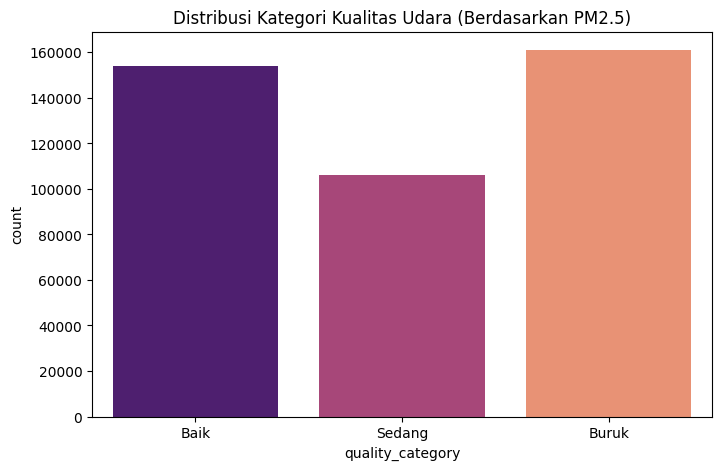

In [9]:
# Membuat kategori kualitas udara berdasarkan PM2.5 (Manual Grouping)
def categorize_air_quality(pm25):
    if pm25 <= 35:
        return 'Baik'
    elif pm25 <= 75:
        return 'Sedang'
    else:
        return 'Buruk'

main_df['quality_category'] = main_df['PM2.5'].apply(categorize_air_quality)

# Melihat jumlah data per kategori
print(main_df['quality_category'].value_counts())

# Visualisasi distribusi kategori
plt.figure(figsize=(8, 5))
sns.countplot(x='quality_category', data=main_df, palette='magma', order=['Baik', 'Sedang', 'Buruk'])
plt.title("Distribusi Kategori Kualitas Udara (Berdasarkan PM2.5)")
plt.show()

**Insight:**
- Berdasarkan teknik manual grouping, kategori Buruk merupakan kelompok dengan frekuensi tertinggi (lebih dari 160.000 data), disusul oleh kategori Baik dan Sedang.

- Tingginya jumlah data dalam kategori "Buruk" menunjukkan bahwa masalah polusi udara di wilayah-wilayah stasiun pemantauan ini merupakan kondisi yang cukup sering terjadi dan memerlukan perhatian serius.

- Visualisasi ini memberikan ringkasan yang lebih intuitif dibandingkan hanya melihat angka mentah konsentrasi polutan.

## Conclusion

- Conclusion Pertanyaan 1: Kualitas udara di berbagai stasiun pemantauan menunjukkan variasi yang signifikan. Stasiun Dongsi dan Wanshouxigong teridentifikasi sebagai wilayah dengan rata-rata konsentrasi PM2.5 tertinggi, sehingga dapat dianggap sebagai wilayah yang paling "berbahaya" atau terdampak polusi partikel halus. Sebaliknya, stasiun Dingling secara konsisten menunjukkan kualitas udara yang paling baik di antara seluruh stasiun yang diamati selama periode 2013-2017.

- Conclusion Pertanyaan 2: Terdapat korelasi negatif antara kecepatan angin (WSPM) dan konsentrasi PM10 (sekitar -0.18). Hal ini membuktikan bahwa faktor meteorologi, khususnya angin, berperan dalam membantu dispersi atau penyebaran polutan di udara. Sementara itu, variabel cuaca lain seperti suhu dan curah hujan tidak menunjukkan hubungan linear yang kuat terhadap tingkat PM10 dalam dataset ini.

In [10]:
# Menyimpan dataframe yang sudah bersih untuk digunakan di dashboard
main_df.to_csv("main_data.csv", index=False)